In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Taking a look at Wayne L. Winston's book "Microsoft Excel 2016, Data Analysis and Business Modeling" I found the following an excercise consisting in finding the best combination between costs and prices to obtain the maximum profit for a coffee business. The result in the Excel spreadsheet looked as shown below.

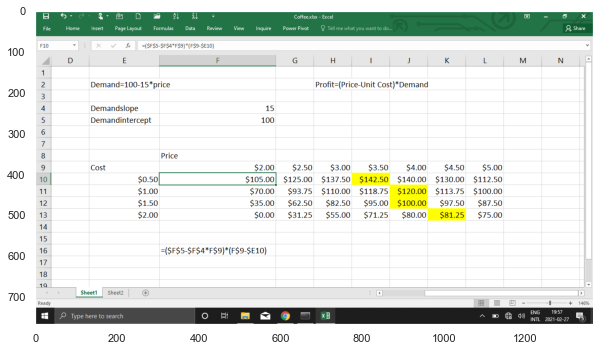

In [37]:
plt.figure(figsize=(10,8))
img = plt.imread('Screenshot (2).png')
plt.imshow(img)
plt.grid(False)
plt.show()

I tried to implement the same process in Pandas with a couple visualizations as follows

In [15]:
# prices ranging from $2.00 to $5.00 increasing every unit price in $0.50
prices = np.arange(2,5.5,0.5).flatten()

# costs ranging from $0.50 to $2.50 increasing every unit cost in $0.50
costs = np.arange(0.5, 2.5, 0.5).flatten()

d_slope = 15 # representing decrease in demand for every increment of price (obtained through domain knowledge)
d_intercept = 100

In [38]:
print(list(costs))
print(list(prices))

[0.5, 1.0, 1.5, 2.0]
[2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


## Our task is to find the best combination between cost and price to have the highest profit, taking into account the slope in demand by price increase/decrease.

In [17]:
profit = []
demand_over_time = [] # to see later how demand behaves according to price changes
demand = 0
for price in prices:
    demand = d_intercept - d_slope * price
    demand_over_time.append(demand)
    for cost in costs:
        profit.append((price - cost) * demand)
profit = np.array(profit).reshape(7,4).transpose()
print(profit)

[[105.   125.   137.5  142.5  140.   130.   112.5 ]
 [ 70.    93.75 110.   118.75 120.   113.75 100.  ]
 [ 35.    62.5   82.5   95.   100.    97.5   87.5 ]
 [  0.    31.25  55.    71.25  80.    81.25  75.  ]]


Let's take a look at the demand behavior according to price

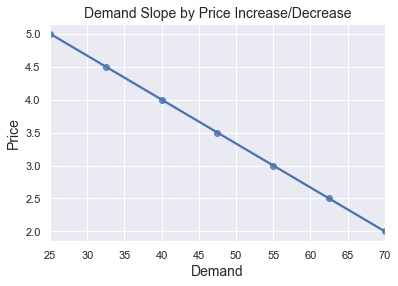

In [25]:
sns.regplot(x=demand_over_time, y=prices)
plt.title('Demand Slope by Price Increase/Decrease', fontsize=14)
plt.xlabel('Demand', fontsize=14)
plt.ylabel('Price', fontsize=14);

In [27]:
df = pd.DataFrame(profit, index=costs, columns=prices)
df

,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0.5,105.0,125.00,137.5,142.50,140.0,130.00,112.5
1.0,70.0,93.75,110.0,118.75,120.0,113.75,100.0
1.5,35.0,62.50,82.5,95.00,100.0,97.50,87.5
2.0,0.0,31.25,55.0,71.25,80.0,81.25,75.0


Let's highlight the values with the highest profit to find our best (cost & price) combinations as shown in the Excel's screenshot.

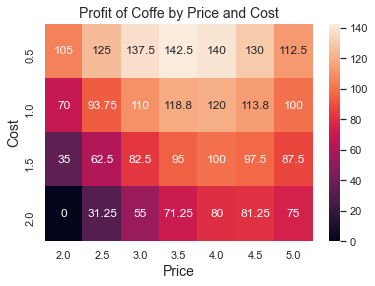

In [28]:
sns.heatmap(df, annot=True, fmt='.4g')
plt.title('Profit of Coffe by Price and Cost', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Cost', fontsize=14);

## The highest profit is obtained by offering the coffee for 3.50 Dollars at a cost of 0.50 Dollars. 